In [1]:
#THIS IS AN EXAMPLE OF MULTIVARIATE, MULTISTEP TIME SERIES PREDICTION WITH LSTM 
#import the necessary packages
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the training dataset
df_full = pd.read_csv("C:/Users/madhumitha/Downloads/TrainDatasetStockPrice.csv")

In [3]:
#cleaning the training dataset
df_full = df_full.dropna()
df_full = df_full.replace([np.inf, -np.inf], np.nan)
df_full = df_full.dropna()

In [4]:
#importing the test dataset that contains only putcall ratio
df = pd.read_csv("C:/Users/madhumitha/Downloads/TestDatasetPutCall_TS.csv")
df.columns

Index(['Stock Index', 'Put-Call Ratio', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [5]:
#Renaming the columns
df=df.rename(columns={'Put-Call Ratio':'Aug10'})
df=df.rename(columns={'Unnamed: 2':'Aug11'})
df=df.rename(columns={'Unnamed: 3':'Aug12'})
df=df.rename(columns={'Unnamed: 4':'Aug13'})
df=df.rename(columns={'Unnamed: 5':'Aug14'})
df=df.rename(columns={'Unnamed: 6':'Aug15'})

In [6]:
df.columns

Index(['Stock Index', 'Aug10', 'Aug11', 'Aug12', 'Aug13', 'Aug14', 'Aug15'], dtype='object')

In [7]:
df.head()

,Stock Index,Aug10,Aug11,Aug12,Aug13,Aug14,Aug15
0,NaN,10-Aug,11-Aug,12-Aug,13-Aug,14-Aug,15-Aug
1,AC3235,0.8,0.66,0.7724,0.983224,0.90121088,0.8983682944
2,AC3236,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
3,AC3237,0.93,0.816,0.95024,1.2073024,NaN,1.181961917
4,AC3238,1.09,1.008,1.16912,1.4830912,1.461062144,1.531000223


In [8]:
#dropping unwanted rows
df = df.drop(index=0,axis=0)
#(or) df = df.drop(df.index[2])

In [9]:
df

,Stock Index,Aug10,Aug11,Aug12,Aug13,Aug14,Aug15
1,AC3235,0.8,0.66,0.7724,0.983224,0.90121088,0.8983682944
2,AC3236,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
3,AC3237,0.93,0.816,0.95024,1.2073024,NaN,1.181961917
4,AC3238,1.09,1.008,1.16912,1.4830912,1.461062144,1.531000223
5,AC3239,NaN,1.104,1.27856,1.6209856,1.615503872,1.705519375
...,...,...,...,...,...,...,...
3327,AD2734,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
3328,AD2735,0.64,0.468,0.55352,0.7074352,0.592327424,0.5493299891
3329,AD2736,0.67,0.504,0.59456,0.7591456,0.650243072,0.6147746714
3330,AD2737,0.79,0.648,0.75872,0.9659872,0.881905664,0.8765534003


In [10]:
df.isnull().sum()

Stock Index      0
Aug10          429
Aug11            2
Aug12           57
Aug13           14
Aug14          105
Aug15          239
dtype: int64

In [11]:
#cleaning test data
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

df

,Stock Index,Aug10,Aug11,Aug12,Aug13,Aug14,Aug15
1,AC3235,0.8,0.66,0.7724,0.983224,0.90121088,0.8983682944
2,AC3236,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
4,AC3238,1.09,1.008,1.16912,1.4830912,1.461062144,1.531000223
7,AC3241,1.23,1.176,1.36064,1.7244064,1.731335168,1.83640874
8,AC3242,1,0.9,1.046,1.32796,1.2873152,1.334666176
...,...,...,...,...,...,...,...
3327,AD2734,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
3328,AD2735,0.64,0.468,0.55352,0.7074352,0.592327424,0.5493299891
3329,AD2736,0.67,0.504,0.59456,0.7591456,0.650243072,0.6147746714
3330,AD2737,0.79,0.648,0.75872,0.9659872,0.881905664,0.8765534003


In [12]:
df =df.reset_index()

In [13]:
df

,index,Stock Index,Aug10,Aug11,Aug12,Aug13,Aug14,Aug15
0,1,AC3235,0.8,0.66,0.7724,0.983224,0.90121088,0.8983682944
1,2,AC3236,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
2,4,AC3238,1.09,1.008,1.16912,1.4830912,1.461062144,1.531000223
3,7,AC3241,1.23,1.176,1.36064,1.7244064,1.731335168,1.83640874
4,8,AC3242,1,0.9,1.046,1.32796,1.2873152,1.334666176
...,...,...,...,...,...,...,...,...
2710,3327,AD2734,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
2711,3328,AD2735,0.64,0.468,0.55352,0.7074352,0.592327424,0.5493299891
2712,3329,AD2736,0.67,0.504,0.59456,0.7591456,0.650243072,0.6147746714
2713,3330,AD2737,0.79,0.648,0.75872,0.9659872,0.881905664,0.8765534003


In [14]:
#THIS TRANSPOSE IS TAKEN SO AS TO MAKE EACH COLUMN REPRESENT ONE TIME SERIES AND GET THE OUTPUT FOR EACH TIME SERIES
# ie)FOR ALL DIFFERENT STOCKS, THE PUT CALL RATIO DURING THE NEXT TIME STEP IS TO BE PREDICTED(MULTIPLE OUTPUTS ARE TO BE OBTAINED) 
df_new = df.drop(columns = ["Stock Index", "index"])
df_new = df_new.T     #having the time series as columns and the time stamps as the row indices
df_new

,0,1,2,3,4,5,6,7,8,9,...,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714
Aug10,0.8,0.86,1.09,1.23,1,1,1.03,0.88,0.71,0.62,...,0.86,0.6,0.75,0.99,1.01,0.86,0.64,0.67,0.79,0.74
Aug11,0.66,0.732,1.008,1.176,0.9,0.9,0.936,0.756,0.552,0.444,...,0.732,0.42,0.6,0.888,0.912,0.732,0.468,0.504,0.648,0.588
Aug12,0.7724,0.85448,1.16912,1.36064,1.046,1.046,1.08704,0.88184,0.64928,0.52616,...,0.85448,0.4988,0.704,1.03232,1.05968,0.85448,0.55352,0.59456,0.75872,0.69032
Aug13,0.983224,1.0866448,1.4830912,1.7244064,1.32796,1.32796,1.3796704,1.1211184,0.8280928,0.6729616,...,1.0866448,0.638488,0.89704,1.3107232,1.3451968,1.0866448,0.7074352,0.7591456,0.9659872,0.8798032
Aug14,0.90121088,1.017042176,1.461062144,1.731335168,1.2873152,1.2873152,1.345230848,1.055652608,0.727463936,0.553716992,...,1.017042176,0.51510656,0.8046848,1.268009984,1.306620416,1.017042176,0.592327424,0.650243072,0.881905664,0.785379584
Aug15,0.8983682944,1.029257659,1.531000223,1.83640874,1.334666176,1.334666176,1.400110858,1.072887447,0.7020342477,0.505700201,...,1.029257659,0.4620704128,0.789293824,1.312851282,1.35648107,1.029257659,0.5493299891,0.6147746714,0.8765534003,0.7674789299


In [15]:
#each row in the transpose or each array set in the below array has different features but with same time stamp
#features are nothing but the time dependent variables and multiple features are to be considered for every time stamp.
#scaling the values between 0 and 1 for better accuracy
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_new.values)
df_scaled

array([[0.43313615, 0.36092451, 0.1567877 , ..., 0.65060891, 0.44655886,
        0.52089902],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34774645, 0.34535964, 0.3080687 , ..., 0.35493459, 0.34819012,
        0.35064729],
       [1.        , 1.        , 0.90839579, ..., 1.        , 1.        ,
        1.        ],
       [0.74626538, 0.8037399 , 0.86627524, ..., 0.57317497, 0.73558201,
        0.67641336],
       [0.7374709 , 0.83818417, 1.        , ..., 0.43416258, 0.71875032,
        0.61506841]])

In [16]:
# having the dataset as x and y . Making x into a 3-d data and y as 2-d data ie.) reshaping
X_train = []
y_train = []

n_output_steps = 1  # Number of outputs we want to predict into the future
n_input_steps = 1   # Number of past inputs that we want to use to predict the future

for i in range(n_input_steps, len(df_scaled) - n_output_steps +1):
    X_train.append(df_scaled[i - n_input_steps:i, 0:df_new.shape[1] - 1])
    y_train.append(df_scaled[i + n_output_steps - 1:i + n_output_steps, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))   # no.of samples, no. of time stamps, no. of features
print('y_train shape == {}.'.format(y_train.shape))   # no. of samples, no. of output time steps

X_train shape == (5, 1, 2714).
y_train shape == (5, 1).


In [17]:
#for better understanding of how the data is splitted
df_new.shape[1]
len(df_scaled)
#len(df_scaled)

6

In [18]:
X_train.shape[2]

2714

In [19]:
# creating the lstm model

from keras.layers import Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input_steps, X_train.shape[2])))
model.add(LSTM(100, activation='relu'))
model.add(Dense(2714))             # since we need the prediction of these many stocks
model.compile(optimizer='adam', loss='mse')

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=100, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=20)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4196
Epoch 00001: val_loss improved from inf to 0.54102, saving model to weights.h5
1/1 [==============================] - 1s 1s/step - loss: 0.4196 - val_loss: 0.5410
Epoch 2/100
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - ETA: 0s - loss: 0.4179
Epoch 00002: val_loss improved from 0.54102 to 0.53170, saving model to weights.h5
1/1 [==============================] - 0s 140ms/step - loss: 0.4179 - val_loss: 0.5317
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4135
Epoch 00003: val_loss improved from 0.53170 to 0.51038, saving model to weights.h5
1/1 [==============================] - 0s 227ms/step - loss: 0.4135 - val_loss: 0.5104
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4043
Epoch 00004: val_loss improved from 0.51038 to 0.47549, saving model to weights.h5
1/1 [==============================] - 0s 213m

In [21]:
#just making predictions in the train set itself and also into the future
predictions_future = model.predict(X_train[-n_output_steps:])
predictions_train = model.predict(X_train[n_input_steps:])

In [22]:
print(predictions_train.shape)
predictions_train

(4, 2714)


array([[0.02264719, 0.02422681, 0.02334069, ..., 0.0217242 , 0.02757692,
        0.02045876],
       [0.6620008 , 0.9652636 , 0.8852825 , ..., 0.79204714, 0.73258543,
        0.5228946 ],
       [0.68178076, 0.7280743 , 0.7424579 , ..., 0.59399563, 0.7865799 ,
        0.9612661 ],
       [1.3266679 , 1.7623531 , 1.378633  , ..., 1.5259216 , 1.4811774 ,
        1.1819019 ]], dtype=float32)

In [23]:
print(predictions_future.shape)
predictions_future

(1, 2714)


array([[1.3266679, 1.7623526, 1.3786325, ..., 1.5259216, 1.4811774,
        1.1819018]], dtype=float32)

In [24]:
y_pred = pd.DataFrame(predictions_future)
y_pred = y_pred.T            #changing the values from array into a dataframe and converting it into columns
#y_pred = y_pred.loc[0:2414]
y_pred

,0
0,1.326668
1,1.762353
2,1.378633
3,1.285233
4,1.777841
...,...
2709,1.245801
2710,1.803109
2711,1.525922
2712,1.481177


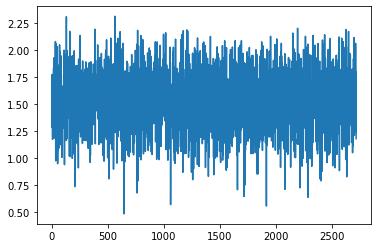

In [25]:
#plotting the future values and visualizing the time series
plt.plot(y_pred.values);

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import yellowbrick 
import warnings
warnings.filterwarnings('ignore')

In [28]:
#featurisation
#taking the training data to predict the stock price

x = df_full[['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
y = df_full['Stock Price']
#np.reshape(y,2103,1)
print(x.shape)
print(y.shape)

(6592, 11)
(6592,)


RMSE: 3.5236317194705133
R^2: 0.9999248921335616


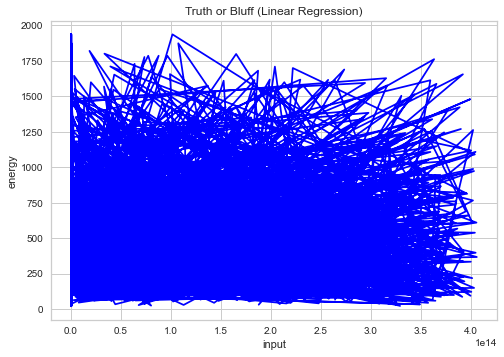

In [29]:
# making the prediction of the stock prices using POLYNOMIAL REGRESSION FIT

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =1)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly_train = poly_reg.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly_train, y_train)


x_poly_test = poly_reg.fit_transform(x_test)
y_poly_pred = model.predict((x_poly_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_poly_pred)))
print("R^2:",r2_score(y_test,y_poly_pred))

# Visualizing the Polymonial Regression results
def viz_polynomial():
    plt.plot(x_test, y_test, color='red')
    plt.plot(x_poly_test, y_poly_pred, color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('input')
    plt.ylabel('energy')
    plt.show()
    return

viz_polynomial() 

In [30]:
y_poly_pred

array([732.23969286, 793.8541733 , 170.04696106, ...,  92.76322571,
       299.35716454, 326.37918001])

In [31]:
#importing the test dataset in which the PCR value is to be replaced with our predicted value, so that the stock price for 16th august is obtained
df_test = pd.read_csv("C:/Users/madhumitha/Downloads/TestDatasetStockPrice.csv")
df

,index,Stock Index,Aug10,Aug11,Aug12,Aug13,Aug14,Aug15
0,1,AC3235,0.8,0.66,0.7724,0.983224,0.90121088,0.8983682944
1,2,AC3236,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
2,4,AC3238,1.09,1.008,1.16912,1.4830912,1.461062144,1.531000223
3,7,AC3241,1.23,1.176,1.36064,1.7244064,1.731335168,1.83640874
4,8,AC3242,1,0.9,1.046,1.32796,1.2873152,1.334666176
...,...,...,...,...,...,...,...,...
2710,3327,AD2734,0.86,0.732,0.85448,1.0866448,1.017042176,1.029257659
2711,3328,AD2735,0.64,0.468,0.55352,0.7074352,0.592327424,0.5493299891
2712,3329,AD2736,0.67,0.504,0.59456,0.7591456,0.650243072,0.6147746714
2713,3330,AD2737,0.79,0.648,0.75872,0.9659872,0.881905664,0.8765534003


In [32]:
#cleaning test data
df_test = df_test.dropna()
df_test = df_test.replace([np.inf, -np.inf], np.nan)
df_test = df_test.dropna()

In [33]:
df_test.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
6,AC3241,BSE,Materials,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60


In [34]:
#Replacing the PCR column of the test dataset with the predicted value from the time series model
df_test['Put-Call Ratio']= y_pred
df_test = df_test.dropna()
df_test = df_test.replace([np.inf, -np.inf], np.nan)
df_test = df_test.dropna()

x_actual_test = df_test[['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
#np.reshape(y,2103,1)
print(x_actual_test.shape)

(1955, 11)


In [35]:
#testing the values are replaced properly
df_test['Put-Call Ratio'].values

array([1.3266679, 1.7623526, 1.3786325, ..., 1.4447755, 1.6188428,
       1.1819018], dtype=float32)

In [36]:
#transforimg the test dataset
x_poly_actual_test = poly_reg.fit_transform(x_actual_test)
y_poly_actual_pred= model.predict((x_poly_actual_test))

In [37]:
#prediction 
print(y_poly_actual_pred)

[ 810.26909618  256.63010178 1553.92027229 ...  209.89550779  828.30395695
   68.20007816]


In [38]:
result = pd.DataFrame(y_poly_actual_pred)

In [39]:
#putting the values in the dataframe
result.index = df_test['Stock Index'] 
result

,0
Stock Index,
AC3235,810.269096
AC3236,256.630102
AC3237,1553.920272
AC3238,832.744775
AC3241,725.448061
...,...
AD2108,280.272501
AD2109,178.304563
AD2110,209.895508


In [40]:
#converting the dataframe values to a csv file 
result.to_csv('stockprices_pred_lstm_model.csv')